# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Plot the monthly skill counts
3. Re-analyze based on percentage of total jobs
4. Plot the monthly skill demand

#### Original Exploration
[12_Exercise_Trending_Skills.ipynb](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

## Import Libraries and Data

In [54]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Group the Skills by Month

Select only those job postings that are for Data Analysts and then extracts the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [55]:
## Skill count per month for data analysts
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

### Pivot in Prep for Plotting

Create a pivot table from the `df_DA_US_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero. It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table. 

In [56]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,52,0,1,0,0,1,1,8,...,2,0,0,2,11,0,164,0,0,3
2,14,0,34,1,2,0,0,3,2,7,...,0,4,1,1,21,1,130,0,0,2
3,11,0,39,1,3,0,0,6,2,4,...,1,3,0,2,14,2,151,0,0,4
4,5,0,57,1,0,0,0,2,0,1,...,2,0,0,1,24,5,141,1,0,2
5,6,1,34,0,3,0,0,1,2,1,...,0,0,0,1,20,0,91,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,127,0,0,2
7,13,0,32,0,1,0,0,1,0,4,...,0,0,0,0,14,2,101,0,1,0
8,9,2,31,0,0,0,0,0,0,14,...,0,0,0,1,16,0,113,0,0,5
9,5,0,19,1,0,1,0,1,0,0,...,2,1,0,0,11,0,66,0,0,2


#### Sort columns by count and change month numbers to names

In [57]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,theano,flutter,ringcentral,symphony,svelte,chainer,sqlserver,clojure,elixir,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1148,784,647,531,326,390,343,164,174,168,...,0,0,1,0,0,0,0,0,0,0
2,779,545,417,379,302,278,227,130,130,98,...,0,0,0,0,0,0,0,0,0,0
3,814,584,463,407,275,302,247,151,132,113,...,0,0,0,0,0,0,0,0,0,0
4,830,574,451,414,294,252,235,141,136,121,...,0,1,0,0,0,0,0,0,0,0
5,714,494,371,336,253,214,215,91,120,95,...,0,0,0,0,0,0,0,0,0,0
6,735,488,392,389,273,200,246,127,117,94,...,0,0,0,0,0,0,0,0,0,0
7,562,442,301,291,198,176,188,101,98,64,...,0,0,0,0,0,0,1,0,0,1
8,789,642,483,464,289,274,321,113,134,103,...,0,0,0,0,0,0,0,1,0,0
9,487,329,276,257,186,144,162,66,53,65,...,0,0,0,1,0,0,0,0,0,0


## Plot the Monthly Skill Counts

Plot a line chart of the top five skills for data analysts, indexed by month. It excludes the 'Total' row and plots only the monthly data. Then it selects the first five columns and plots them. 

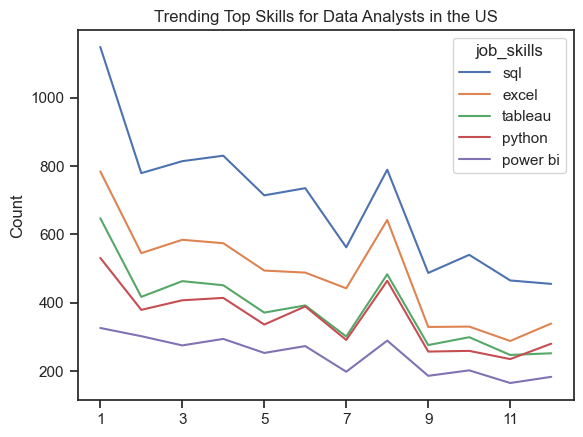

In [58]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in `df_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [59]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1817
2     1289
3     1366
4     1367
5     1169
6     1196
7      967
8     1417
9      857
10     978
11     845
12     851
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [60]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,theano,flutter,ringcentral,symphony,svelte,chainer,sqlserver,clojure,elixir,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,63.181068,43.148046,35.608145,29.223996,17.941662,21.463952,18.877270,9.025867,9.576225,9.246010,...,0.000000,0.000000,0.055036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.434445,42.280838,32.350659,29.402638,23.429015,21.567106,17.610551,10.085337,10.085337,7.602793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,59.590044,42.752562,33.894583,29.795022,20.131772,22.108346,18.081991,11.054173,9.663250,8.272328,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,60.716898,41.989759,32.991953,30.285296,21.506950,18.434528,17.190929,10.314557,9.948793,8.851500,...,0.000000,0.073153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.077844,42.258340,31.736527,28.742515,21.642429,18.306245,18.391788,7.784431,10.265184,8.126604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.454849,40.802676,32.775920,32.525084,22.826087,16.722408,20.568562,10.618729,9.782609,7.859532,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.117890,45.708376,31.127198,30.093071,20.475698,18.200620,19.441572,10.444674,10.134436,6.618407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103413,0.000000,0.000000,0.103413
Aug,55.681016,45.306987,34.086097,32.745236,20.395201,19.336627,22.653493,7.974594,9.456598,7.268878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070572,0.000000,0.000000
Sep,56.826138,38.389732,32.205368,29.988331,21.703617,16.802800,18.903151,7.701284,6.184364,7.584597,...,0.000000,0.000000,0.000000,0.116686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand 

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first five columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

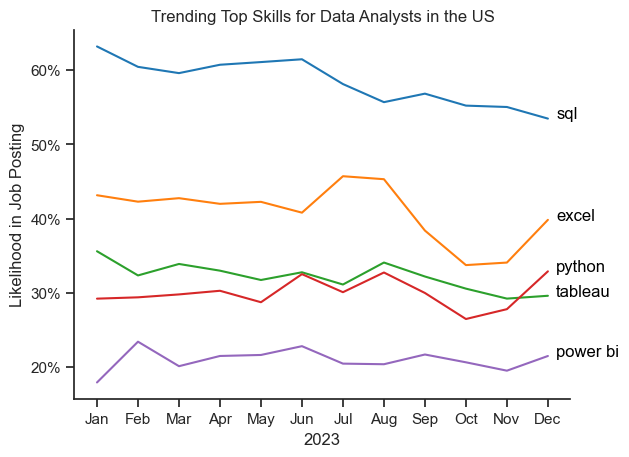

In [61]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()